In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data1 = pd.read_csv('house_prices_dataset.csv')
data1

,sqft,num_rooms,age,house_prices
0,2374.540119,5.0,1.858910,355533.931658
1,2950.714306,4.0,16.441722,442709.876798
2,2731.993942,6.0,16.119085,428475.794689
3,2598.658484,2.0,33.711752,402579.003937
4,2156.018640,6.0,17.280893,329316.585810
...,...,...,...,...
995,2091.582073,3.0,22.870394,322362.529611
996,2917.313575,5.0,6.269013,437122.531191
997,2136.818631,6.0,18.706527,310301.518915
998,2950.237354,5.0,14.046000,459147.804392


In [11]:
data_x = data1.loc[:, :'age']
data_y = data1.loc[:, 'house_prices']

In [12]:
x_train = data_x.loc[:799,:]
y_train = data_y.loc[:799]
print(x_train)
print(y_train)

            sqft  num_rooms        age
0    2374.540119        5.0   1.858910
1    2950.714306        4.0  16.441722
2    2731.993942        6.0  16.119085
3    2598.658484        2.0  33.711752
4    2156.018640        6.0  17.280893
..           ...        ...        ...
795  2872.123909        6.0  10.727846
796  2932.118282        6.0   8.328070
797  2565.133184        2.0  19.569193
798  2696.650824        3.0  26.241422
799  2922.499381        2.0  29.201059

[800 rows x 3 columns]
0      355533.931658
1      442709.876798
2      428475.794689
3      402579.003937
4      329316.585810
           ...      
795    422261.897418
796    433912.465211
797    377983.271053
798    400121.227561
799    437629.307797
Name: house_prices, Length: 800, dtype: float64


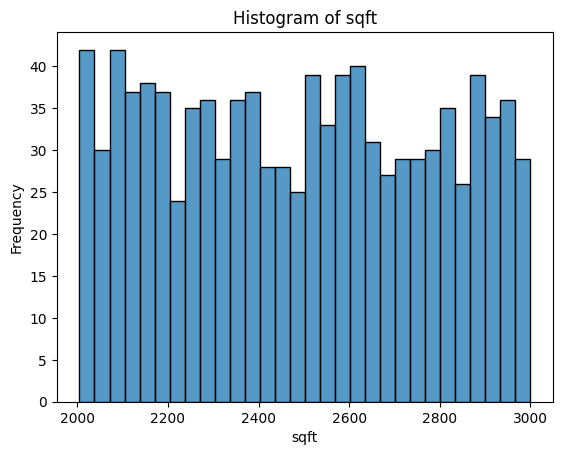

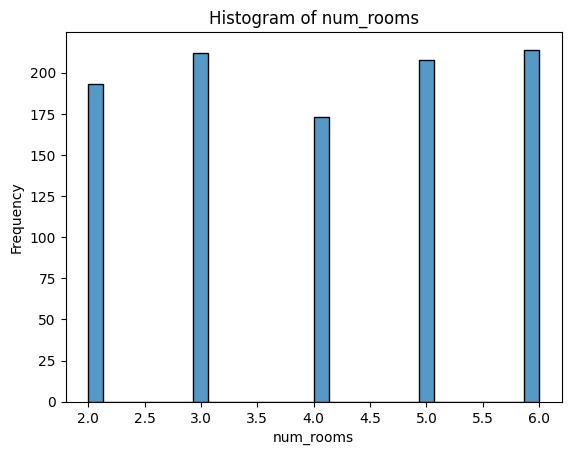

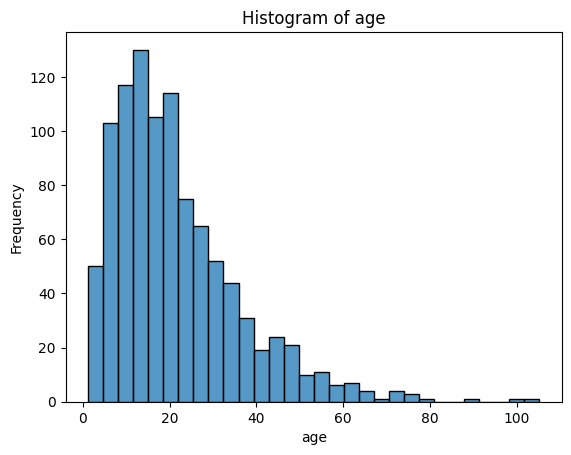

In [14]:
for column in data_x.columns:
    sns.histplot(data_x[column], kde=False, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_13392\1376326992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['age'] = np.log(data_x['age'])


<Axes: xlabel='age', ylabel='Count'>

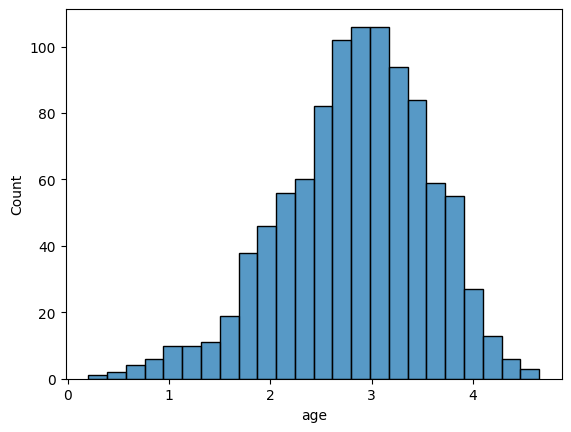

In [16]:
data_x['age'] = np.log(data_x['age'])
sns.histplot(data_x['age'])

In [43]:
#Feature scaling by mean normalization
data_x2 = data_x.copy()
for column in data_x.columns:
    data_x2[column] = (data_x[column]-data_x[column].mean())/(data_x[column].max() - data_x[column].min())
data_x2

,sqft,num_rooms,age
0,-0.116288,0.2405,-0.497114
1,0.462732,-0.0095,-0.007673
2,0.242931,0.4905,-0.012123
3,0.108937,-0.5095,0.153547
4,-0.335889,0.4905,0.003504
...,...,...,...
995,-0.400643,-0.2595,0.066427
996,0.429166,0.2405,-0.224167
997,-0.355183,0.4905,0.021303
998,0.462252,0.2405,-0.043033


In [46]:
x_train = data_x2.loc[:799,:]
y_train = data_y.loc[:799]
print(x_train)
print(y_train)

         sqft  num_rooms       age
0   -0.116288     0.2405 -0.497114
1    0.462732    -0.0095 -0.007673
2    0.242931     0.4905 -0.012123
3    0.108937    -0.5095  0.153547
4   -0.335889     0.4905  0.003504
..        ...        ...       ...
795  0.383753     0.4905 -0.103543
796  0.444044     0.4905 -0.160397
797  0.075246    -0.5095  0.031426
798  0.207414    -0.2595  0.097300
799  0.434378    -0.5095  0.121294

[800 rows x 3 columns]
0      355533.931658
1      442709.876798
2      428475.794689
3      402579.003937
4      329316.585810
           ...      
795    422261.897418
796    433912.465211
797    377983.271053
798    400121.227561
799    437629.307797
Name: house_prices, Length: 800, dtype: float64


In [47]:
x_train.shape

(800, 3)

In [74]:
num_features = x_train.shape[1]
iniweights = np.random.randn(1, num_features) * 0.01
inibias = 0.0
print("Initial Weights:")
print(iniweights)
print("Initial Bias:")
print(inibias)

Initial Weights:
[[-0.01919176 -0.02189629  0.00492286]]
Initial Bias:
0.0


In [48]:
print(x_train.values)
print(y_train.values)

[[-0.11628791  0.2405     -0.49711438]
 [ 0.46273178 -0.0095     -0.00767275]
 [ 0.24293124  0.4905     -0.01212255]
 ...
 [ 0.07524642 -0.5095      0.03142598]
 [ 0.20741357 -0.2595      0.09729971]
 [ 0.43437751 -0.5095      0.12129449]]
[355533.93165798 442709.87679765 428475.79468914 402579.00393667
 329316.58580953 336696.17126899 305575.25851065 419523.59038967
 394166.64895555 406187.90100313 301478.68998661 457858.66288774
 427320.58116868 334936.97615476 324753.69019094 337053.24646333
 353070.1792072  388010.70696933 360972.02114743 357535.06120419
 410497.46400415 330048.89173561 337996.57307088 347843.8437596
 365581.18161078 412536.88997092 329562.97537191 384669.79828989
 392527.77749103 309946.36682085 389747.95282206 325343.2286456
 318110.35850035 423266.35370491 445158.60808199 425065.75175841
 353950.77500038 305721.70511497 392971.44595435 372371.98188104
 299606.30359696 388363.19419059 308434.38760575 453173.26011238
 329273.37588915 395728.43223076 324217.9944485

In [49]:
x_train_np = x_train.values
y_train_np = y_train.values.reshape(-1,1)
learning_rate = 0.01
num_iterations = 1000

In [59]:
print(x_train_np.shape)
print(y_train_np.shape)

(800, 3)
(800, 1)


In [75]:
x_train_np.dot(weights)

array([[-39620.74799109,  13739.42564367,   2611.22363806],
       [ 39133.06678957, -45226.13208042,  -8476.5286212 ],
       [ 98160.63189552, -26062.7340857 ,  -4934.98998908],
       ...,
       [-69902.95433427,  -5148.4408814 ,   -916.48074182],
       [ -9357.99185346, -19757.61088174,  -3688.97881962],
       [-25377.47304699, -40959.36008981,  -7640.77299691]])

Learned Weights:
[[ 1.48798644e+05 -5.19703146e+01  2.76202916e+03]]
Learned Bias:
374042.5220561713


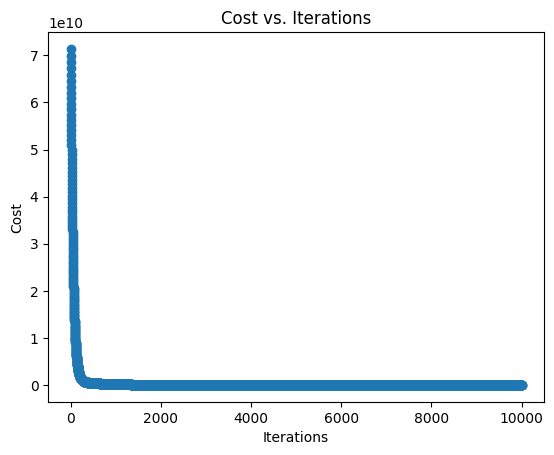

In [99]:
weights = iniweights
bias = inibias
costs = []
num_iterations = 10000
for i in range(num_iterations):
    m,n = x_train_np.shape
    # Calculate predictions
    predictions = np.dot(weights, x_train_np.T) + bias
    errors = predictions - y_train_np.T

    cost = (1 / (2 * m)) * np.sum(errors**2)
    costs.append(cost)

    weights = weights - learning_rate * (np.dot(errors,x_train_np))*(1/m)
    bias = bias - learning_rate * np.sum(errors)*(1/m)
    
    

# Display the learned weights and bias
print("Learned Weights:")
print(weights)
print("Learned Bias:")
print(bias)

plt.plot(range(1, num_iterations + 1), costs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [133]:
def predict(x):
    y = np.dot(weights, x)+bias
    print("Prediction  : ",y)
    return y[0]

In [102]:
predict(np.array([-0.355183,	0.4905,	0.021303]))
predict(np.array([0.462252,	0.2405,	-0.043033]))
predict(np.array([-0.044469, -0.0095,	0.224467]))

Prediction  :  [321225.12142741]
Prediction  :  [442693.63548317]
Prediction  :  [368046.07328193]


In [105]:
data_x2

,sqft,num_rooms,age
0,-0.116288,0.2405,-0.497114
1,0.462732,-0.0095,-0.007673
2,0.242931,0.4905,-0.012123
3,0.108937,-0.5095,0.153547
4,-0.335889,0.4905,0.003504
...,...,...,...
995,-0.400643,-0.2595,0.066427
996,0.429166,0.2405,-0.224167
997,-0.355183,0.4905,0.021303
998,0.462252,0.2405,-0.043033


In [127]:
x_test = (data_x2.loc[800:, :].reset_index(drop=True))
y_test = data_y.loc[800:].reset_index(drop=True)
print(x_test)
print(y_test)

         sqft  num_rooms       age
0    0.218054     0.2405  0.156596
1   -0.339385    -0.5095  0.266832
2    0.086457     0.2405  0.027821
3    0.117034     0.2405 -0.027889
4   -0.066452    -0.0095  0.262827
..        ...        ...       ...
195 -0.400643    -0.2595  0.066427
196  0.429166     0.2405 -0.224167
197 -0.355183     0.4905  0.021303
198  0.462252     0.2405 -0.043033
199 -0.044469    -0.0095  0.224467

[200 rows x 3 columns]
0      398751.963666
1      312297.505059
2      389014.733783
3      389881.417020
4      361102.598743
           ...      
195    322362.529611
196    437122.531191
197    310301.518915
198    459147.804392
199    364562.653447
Name: house_prices, Length: 200, dtype: float64


In [128]:
data_y

0      355533.931658
1      442709.876798
2      428475.794689
3      402579.003937
4      329316.585810
           ...      
995    322362.529611
996    437122.531191
997    310301.518915
998    459147.804392
999    364562.653447
Name: house_prices, Length: 1000, dtype: float64

In [134]:
y_calc = []
for datas in x_test.values:
    y_calc.append(predict(datas))
y_calc

Prediction  :  [406908.6354883]
Prediction  :  [324305.91582209]
Prediction  :  [386971.50381439]
Prediction  :  [391367.43840787]
Prediction  :  [364880.9174378]
Prediction  :  [410912.4386594]
Prediction  :  [440269.70572067]
Prediction  :  [439758.40478135]
Prediction  :  [368064.14792289]
Prediction  :  [317980.66781282]
Prediction  :  [447794.25122747]
Prediction  :  [426501.10214849]
Prediction  :  [319741.41196733]
Prediction  :  [439024.80049412]
Prediction  :  [430733.28446136]
Prediction  :  [378452.77344792]
Prediction  :  [389407.22499898]
Prediction  :  [360439.34434823]
Prediction  :  [308619.1761138]
Prediction  :  [351323.19745899]
Prediction  :  [420902.50350613]
Prediction  :  [300659.99815488]
Prediction  :  [350073.57887362]
Prediction  :  [360207.29172972]
Prediction  :  [380904.69563157]
Prediction  :  [437638.3091379]
Prediction  :  [352051.36689248]
Prediction  :  [353316.82560633]
Prediction  :  [411450.05752424]
Prediction  :  [368937.87024206]
Prediction  :  

[406908.63548830437,
 324305.9158220917,
 386971.5038143921,
 391367.438407867,
 364880.9174378012,
 410912.43865940016,
 440269.7057206652,
 439758.4047813464,
 368064.14792288915,
 317980.66781282047,
 447794.2512274688,
 426501.10214848875,
 319741.4119673348,
 439024.8004941194,
 430733.2844613599,
 378452.7734479187,
 389407.224998984,
 360439.3443482259,
 308619.17611380265,
 351323.1974589916,
 420902.50350612914,
 300659.9981548771,
 350073.57887362107,
 360207.291729721,
 380904.6956315741,
 437638.30913790246,
 352051.36689247505,
 353316.8256063331,
 411450.0575242388,
 368937.87024205725,
 334982.70370660326,
 368320.1449958842,
 322120.5327223997,
 325995.1713604571,
 375526.391476008,
 363054.52766397886,
 437335.84308280115,
 355103.5521267415,
 387573.586781284,
 395085.7100362924,
 302510.1076701662,
 399537.6678770708,
 326708.1456201389,
 443753.1089322555,
 323328.3247161557,
 362679.219434645,
 314085.72285109584,
 450154.46255940513,
 376056.3678769001,
 389268.26

In [140]:
error_percentages = np.abs(y_test-y_calc)*100/y_test
avg_error_perc = error_percentages.sum()/error_percentages.size
avg_error_perc

2.178098189375471

In [146]:
total_sum_squares = np.sum((y_test - y_test.mean())**2)
residual_sum_squares = np.sum((y_test - y_calc)**2)

r2_score = 1 - (residual_sum_squares / total_sum_squares)

print("R2 score : ", r2_score)

R2 score :  0.9508472616902138
